In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import squarify
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
data = pd.read_csv("./pokemon.csv")
#The maximum number of rows and columns will be displayed when the dataframe is printed.
pd.set_option('display.max_row', data.shape[0])
pd.set_option('display.max_column', data.shape[1])


In [3]:
data.head()


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


Descriptive Statistics


In [4]:
#First of all let's check on the size of our dataset.
data.shape


(801, 41)

In [5]:
#Now we know that our dataset contains 801 row and 41 column.
#Lets see more details.
data.tail()


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,0.25,0.0,1.0,0.5,0.0,0.5,1.0,0.5,1.0,101,30720,0,570,25,Launch Pokémon,103,1250000,9.2,97,Tekkaguyaテッカグヤ,Celesteela,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5,181,30720,0,570,255,Drawn Sword Pokémon,131,1250000,0.3,59,Kamiturugiカミツルギ,Kartana,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,0.50,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.5,101,30720,0,570,15,Junkivore Pokémon,53,1250000,5.5,223,Akuzikingアクジキング,Guzzlord,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,107,30720,0,600,3,Prism Pokémon,101,1250000,2.4,97,Necrozmaネクロズマ,Necrozma,NaN,800,127,89,79,psychic,NaN,230.0,7,1
800,['Soul-Heart'],0.25,0.5,0.0,1.0,0.5,1.0,2.0,0.5,1.0,0.50,2.0,0.5,0.5,0.0,0.5,0.5,1.0,1.0,95,30720,0,600,3,Artificial Pokémon,115,1250000,1.0,80,Magearnaマギアナ,Magearna,NaN,801,130,115,65,steel,fairy,80.5,7,1


In [6]:
data.sample(5)  # random 5 samples.


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
792,['Beast Boost'],0.5,1.0,1.0,1.0,0.5,1.00,0.5,0.5,1.0,1.00,4.0,1.0,0.5,0.25,2.0,1.0,2.0,2.0,53,30720,0,570,45,Parasite Pokémon,47,1250000,1.2,109,Uturoidウツロイド,Nihilego,NaN,793,127,131,103,rock,poison,55.5,7,1
465,"['Motor Drive', 'Vital Spirit']",1.0,1.0,1.0,0.5,1.0,1.00,1.0,0.5,1.0,1.00,2.0,1.0,1.0,1.00,1.0,1.0,0.5,1.0,123,6400,70,540,30,Thunderbolt Pokémon,67,1000000,1.8,75,Elekibleエレキブル,Electivire,75.4,466,95,85,95,electric,NaN,138.6,4,0
741,"['Honey Gather', 'Shield Dust', 'Sweet Veil']",0.5,0.5,0.0,1.0,1.0,0.25,2.0,2.0,1.0,0.50,0.5,1.0,1.0,2.00,1.0,2.0,2.0,1.0,45,5120,70,304,190,Bee Fly Pokémon,40,1000000,0.1,40,Abulyアブリー,Cutiefly,50.0,742,55,40,84,bug,fairy,0.2,7,0
396,"['Intimidate', 'Reckless']",0.5,1.0,1.0,2.0,1.0,1.00,1.0,1.0,0.0,0.50,0.0,2.0,1.0,1.00,1.0,2.0,1.0,1.0,75,3840,70,340,120,Starling Pokémon,50,1059860,0.6,55,Mukubirdムクバード,Staravia,50.0,397,40,40,80,normal,flying,15.5,4,0
333,"['Natural Cure', 'Cloud Nine']",0.5,1.0,2.0,1.0,2.0,0.50,0.5,1.0,1.0,0.25,0.0,4.0,1.0,1.00,1.0,2.0,1.0,0.5,110,5120,70,590,45,Humming Pokémon,110,600000,1.1,75,Tyltalisチルタリス,Altaria,50.0,334,110,105,80,dragon,flying,20.6,3,0


In [7]:
#Categorical data.
catgData = list()
for col in data:
    if (data[col].dtype == object):
        catgData.append(col)
catgData


['abilities',
 'capture_rate',
 'classfication',
 'japanese_name',
 'name',
 'type1',
 'type2']

In [8]:
#More informations about our dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [9]:
#We can see that we got some missing values.
data.isna().sum()


abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [10]:
#384 in column "type2" ,20 in "height_m "and"weight_kg" and 98 in "percentage_male".
data.isnull().sum()[data.columns[data.isnull().any()]]


height_m            20
percentage_male     98
type2              384
weight_kg           20
dtype: int64

<AxesSubplot: >

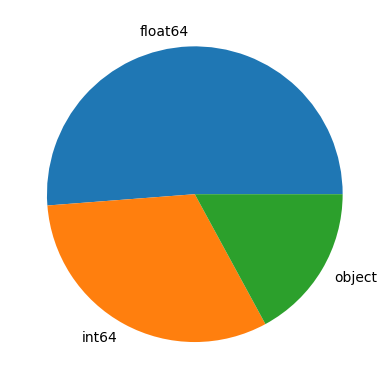

In [11]:
#Data types observation.
data.dtypes.value_counts().plot.pie()


In [12]:
#All data description.
data.describe(include="all")


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
count,801,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801,801,801.000000,8.010000e+02,781.000000,801.000000,801,801,703.000000,801.000000,801.000000,801.000000,801.000000,801,417,781.000000,801.000000,801.000000
unique,482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,588,NaN,NaN,NaN,NaN,801,801,NaN,NaN,NaN,NaN,NaN,18,18,NaN,NaN,NaN
top,['Levitate'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45,Dragon Pokémon,NaN,NaN,NaN,NaN,Fushigidaneフシギダネ,Bulbasaur,NaN,NaN,NaN,NaN,NaN,water,flying,NaN,NaN,NaN
freq,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250,8,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,114,95,NaN,NaN,NaN
mean,NaN,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,1.098002,1.208177,0.887016,0.975343,1.005306,1.250312,0.983458,1.058365,77.857678,7191.011236,65.362047,428.377029,NaN,NaN,73.008739,1.054996e+06,1.163892,68.958801,NaN,NaN,55.155761,401.000000,71.305868,70.911361,66.334582,NaN,NaN,61.378105,3.690387,0.087391
std,NaN,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,0.738818,0.735356,0.266106,0.549375,0.495183,0.697148,0.500117,0.606562,32.158820,6558.220422,19.598948,119.203577,NaN,NaN,30.769159,1.602558e+05,1.080326,26.576015,NaN,NaN,20.261623,231.373075,32.353826,27.942501,28.907662,NaN,NaN,109.354766,1.930420,0.282583
min,NaN,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.250000,0.250000,5.000000,1280.000000,0.000000,180.000000,NaN,NaN,5.000000,6.000000e+05,0.100000,1.000000,NaN,NaN,0.000000,1.000000,10.000000,20.000000,5.000000,NaN,NaN,0.100000,1.000000,0.000000
25%,NaN,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,0.500000,0.500000,55.000000,5120.000000,70.000000,320.000000,NaN,NaN,50.000000,1.000000e+06,0.600000,50.000000,NaN,NaN,50.000000,201.000000,45.000000,50.000000,45.000000,NaN,NaN,9.000000,2.000000,0.000000
50%,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,5120.000000,70.000000,435.000000,NaN,NaN,70.000000,1.000000e+06,1.000000,65.000000,NaN,NaN,50.000000,401.000000,65.000000,66.000000,65.000000,NaN,NaN,27.300000,4.000000,0.000000
75%,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,100.000000,6400.000000,70.000000,505.000000,NaN,NaN,90.000000,1.059860e+06,1.500000,80.000000,NaN,NaN,50.000000,601.000000,91.000000,90.000000,85.000000,NaN,NaN,64.800000,5.000000,0.000000


In [13]:
for i in ["type1", "type2"]:
    print("{} : {}".format(i, data[i].unique()))


type1 : ['grass' 'fire' 'water' 'bug' 'normal' 'poison' 'electric' 'ground'
 'fairy' 'fighting' 'psychic' 'rock' 'ghost' 'ice' 'dragon' 'dark' 'steel'
 'flying']
type2 : ['poison' nan 'flying' 'dark' 'electric' 'ice' 'ground' 'fairy' 'grass'
 'fighting' 'psychic' 'steel' 'fire' 'rock' 'water' 'dragon' 'ghost' 'bug'
 'normal']


In [14]:
data.columns[data.isna().any()]


Index(['height_m', 'percentage_male', 'type2', 'weight_kg'], dtype='object')

Data Preprocessing & Feature Engineering


In [15]:
#Filling the missing values.
data.isna().sum()


abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [16]:
#Replacing the missing values with None.
data["type2"].fillna('None', inplace=True)
#Replacing the missing values with None.
data["percentage_male"].fillna('None', inplace=True)
#Replacing the missing values with the mean of values.
data["weight_kg"].fillna(data["weight_kg"].mean(), inplace=True)
#Replacing the missing values with the mean of values.
data["height_m"].fillna(data["height_m"].mean(), inplace=True)
#We replaced the missing values in "type2" with None because it doesn't make sense replacing it with 0 or the mean.
#And the same for "percentage_male".


In [17]:
data.isna().sum()


abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classfication        0
defense              0
experience_growth    0
height_m             0
hp                   0
japanese_name        0
name                 0
percentage_male      0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
type2                0
weight_kg            0
generation           0
is_legendary         0
dtype: int64

In [18]:
#Lets go back to the categorical data.
catgData


['abilities',
 'capture_rate',
 'classfication',
 'japanese_name',
 'name',
 'type1',
 'type2']

In [19]:
#Capture_rate column has numerical values and still count as categorical.Lets figure out why!
for i in data.capture_rate:
    try:
        type(int(i)) == int
    except:
        print(i)


30 (Meteorite)255 (Core)


In [20]:
#Now we know the reason why.
data[data["capture_rate"] == "30 (Meteorite)255 (Core)"]
#Lets change this.


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
773,['Shields Down'],0.5,1.0,1.0,2.0,1.0,1.0,0.5,0.5,1.0,1.0,0.0,2.0,0.5,0.5,1.0,2.0,2.0,2.0,100,6400,70,500,30 (Meteorite)255 (Core),Meteor Pokémon,60,1059860,0.3,60,Metenoメテノ,Minior,None,774,100,60,120,rock,flying,40.0,7,0


In [21]:
data["capture_rate"].replace({'30 (Meteorite)255 (Core)': '30'}, inplace=True)
data["capture_rate"] = pd.to_numeric(data["capture_rate"])


In [22]:
#We changed the type of the column to integer.
data["capture_rate"].dtypes


dtype('int64')

In [23]:
data.head()


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,None,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,None,19.0,1,0


In [24]:
#We will remove unnecessary columns : "japanese_name" and "pokedex_number".
del data["pokedex_number"]
del data["japanese_name"]


In [25]:
#Also we will join the two columns "type1" and "type2" together ("type1" is the primary type ,"type2" the secondary).
data["type"] = data.apply(lambda x: x["type1"] if (
    x["type2"] == "None") else f'{x["type1"]}_{x["type2"]}', axis=1)


In [26]:
#Adding total abilities that a pokemon has.
data["tot_abilities"] = data.apply(lambda x: len(x["abilities"]), axis=1)

In [27]:
#Adding a column contains the number of abilities,but first lets change the type of the column "abilities" from stringified list to list.
data["abilities"] = data.apply(
    lambda x: ast.literal_eval(x["abilities"]), axis=1)


In [28]:
#Nombre of abilities column.
data["nbr_abilities"] = data.apply(lambda x: len(x["abilities"]), axis=1)


In [29]:
data[["nbr_abilities", "abilities"]].sample(10)


,nbr_abilities,abilities
487,1,[Levitate]
498,2,"[Blaze, Thick Fat]"
243,2,"[Pressure, Inner Focus]"
354,2,"[Levitate, Frisk]"
275,2,"[Guts, Scrappy]"
722,2,"[Overgrow, Long Reach]"
439,3,"[Natural Cure, Serene Grace, Friend Guard]"
157,2,"[Torrent, Sheer Force]"
448,2,"[Sand Stream, Sand Force]"
105,3,"[Limber, Reckless, Unburden]"


In [30]:
data.shape


(801, 42)

Data Analysis & Visualizations


In [31]:
#Lets take a look at the types of pokémons
data["type1"].value_counts().index



Index(['water', 'normal', 'grass', 'bug', 'psychic', 'fire', 'rock',
       'electric', 'poison', 'ground', 'dark', 'fighting', 'ghost', 'dragon',
       'steel', 'ice', 'fairy', 'flying'],
      dtype='object')

In [32]:
data["type2"].value_counts().index


Index(['None', 'flying', 'poison', 'ground', 'psychic', 'fairy', 'fighting',
       'steel', 'dark', 'grass', 'water', 'dragon', 'ice', 'rock', 'ghost',
       'fire', 'electric', 'bug', 'normal'],
      dtype='object')

(0.0, 100.0, 0.0, 100.0)

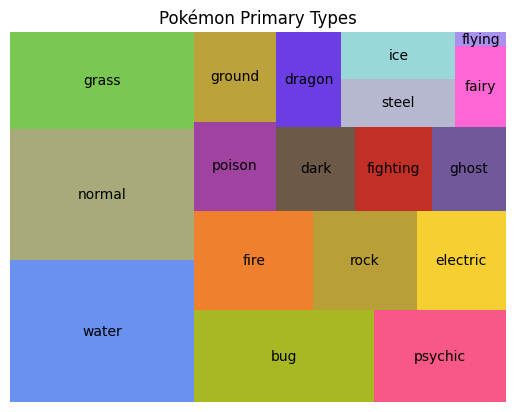

In [33]:
squarify.plot(sizes=data["type1"].value_counts(), label=data["type1"].value_counts().index, color=[
    '#6991F0',
    '#A8AA79',
    '#7AC852',
    '#A7B822',
    '#F85887',
    '#EF812E',
    '#B99F38',
    '#F6D030',
    '#A0429F',
    '#BCA23B',
    '#6D5947',
    '#C12F27',
    '#70589A',
    '#6B3EE3',
    '#B6B8D0',
    '#9AD7D9',
    '#FF65D5',
    '#A991F0',
])
plt.title("Pokémon Primary Types")
plt.axis("off")


(0.0, 100.0, 0.0, 100.0)

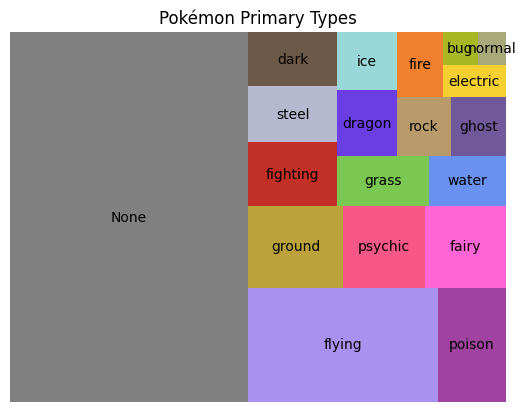

In [34]:
#We can notice that the water and normal are the most frequent in the primary types,lets take a look at the "type2".
squarify.plot(sizes=data["type2"].value_counts(), label=data["type2"].value_counts().index, color=[
    'grey',
    '#A991F0',
    '#A0429F',
    '#BCA23B',
    '#F85887',
    '#FF65D5',
    '#C12F27',
    '#B6B8D0',
    '#6D5947',
    '#7AC852',
    '#6991F0',
    '#6B3EE3',
    '#9AD7D9',
    '#B99B6B',
    '#70589A',
    '#EF812E',
    '#F6D030',
    '#A7B822',
    '#A8AA79',
])

plt.title("Pokémon Primary Types")
plt.axis("off")
#Almost 50% of the pokémons dont have secondary type.

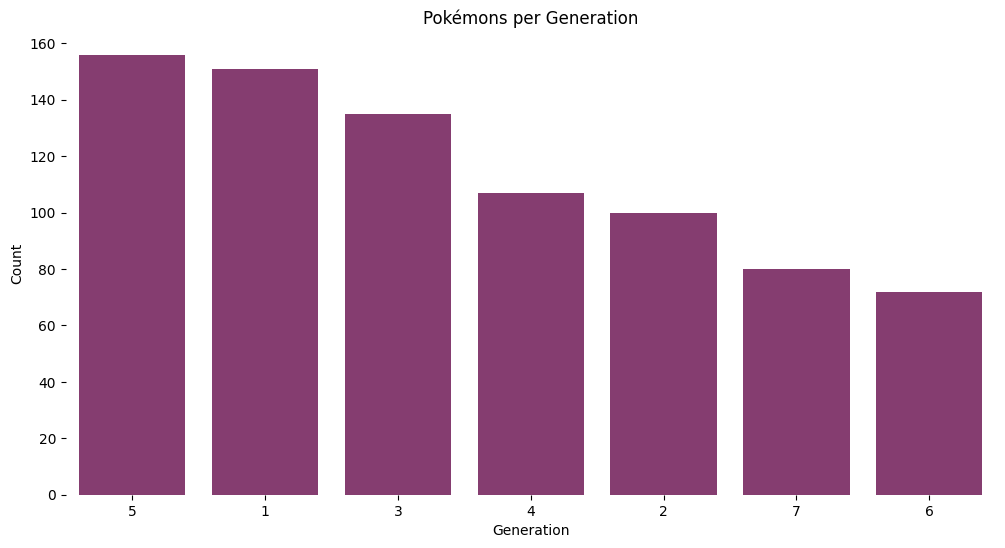

In [35]:
#Pokémons per generation.
plt.figure(figsize=(12,6))
ax = sns.countplot(x='generation',data=data,order=data['generation'].value_counts().index,color="#913175")
ax.set_title('Pokémons per Generation')
ax.set(xlabel='Generation',ylabel='Count')
sns.despine(bottom=True,left=True)

<AxesSubplot: xlabel='defense', ylabel='hp'>

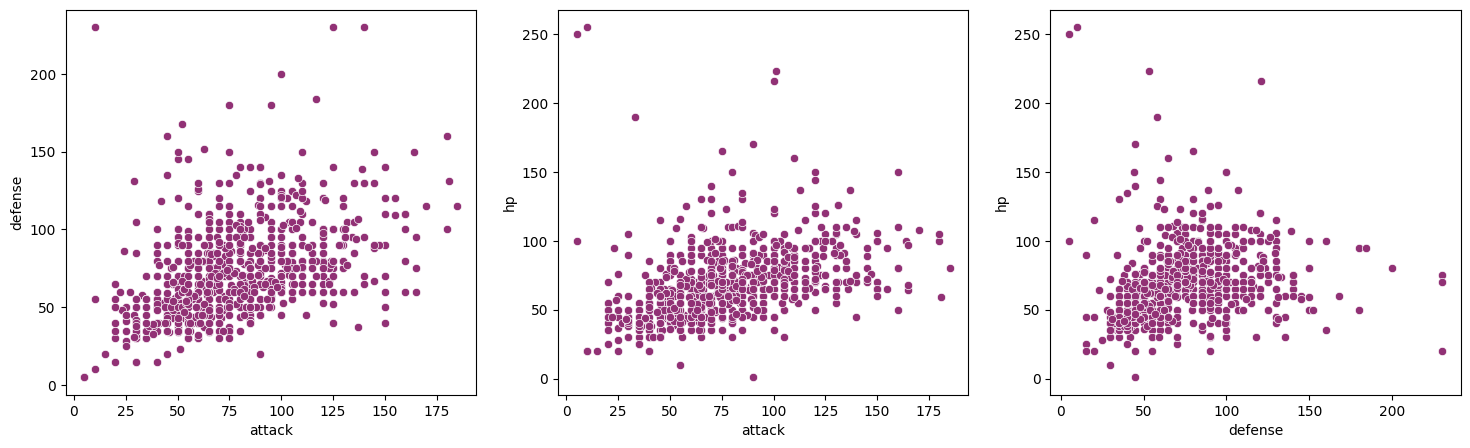

In [36]:
#Relation of "attck" ,"defense" and "hp".
f,axes = plt.subplots(1,3,figsize=(18,5))
sns.scatterplot(x=data.attack, y=data.defense,  color="#913175",ax=axes[0])
sns.scatterplot(x=data.attack,y=data.hp,color="#913175",ax=axes[1])
sns.scatterplot(x=data.defense,y=data.hp,color="#913175",ax=axes[2])


Text(0.5, 1.0, 'Correlation Between Attributes of Legendary Pokémon')

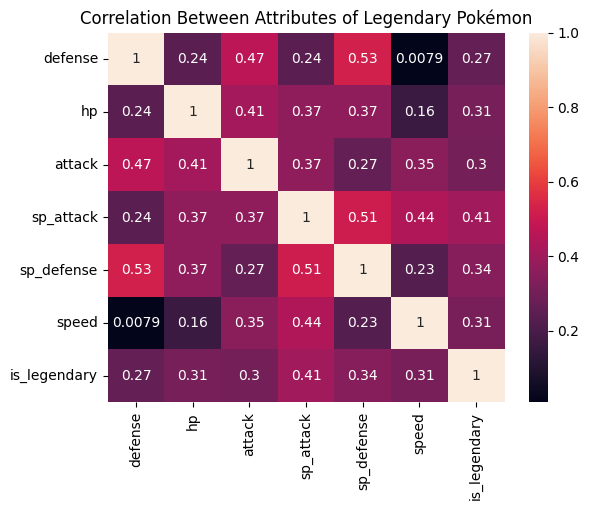

In [37]:
#Correlation between abtributes of legendary pokémons.
corr = data[["defense","hp","attack","sp_attack","sp_defense","speed","is_legendary"]].corr()
sns.heatmap(corr,annot=True)
plt.title('Correlation Between Attributes of Legendary Pokémon')

Text(0.5, 1.0, 'Correlation Between Attributes of Non-legendary Pokémon')

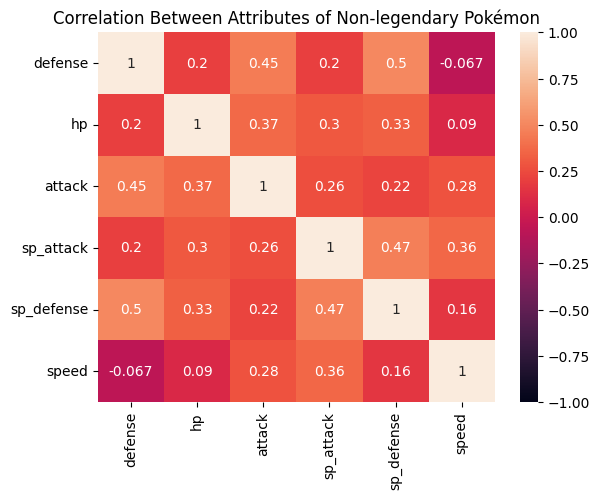

In [38]:
#Correlation between abtributes of legendary pokémons.
corr = data[data["is_legendary"]==0][["defense","hp","attack","sp_attack","sp_defense","speed"]].corr()
sns.heatmap(corr,annot=True,vmax=1,vmin=-1)
plt.title('Correlation Between Attributes of Non-legendary Pokémon')

Legendary pokémon

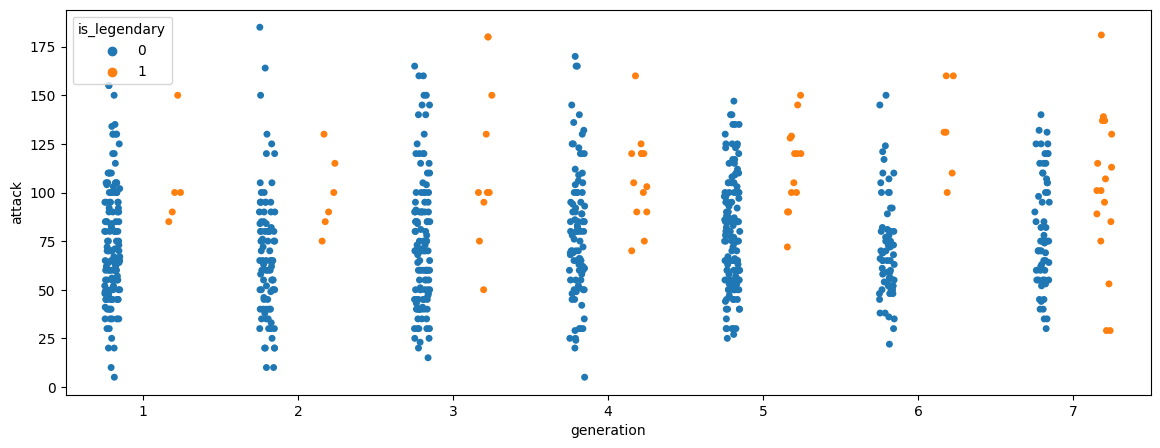

In [39]:
plt.figure(figsize=(14, 5))
sns.stripplot(data=data,
              x="generation",
              y="attack",
              hue="is_legendary",
              dodge=True,    # separate strips of points of different colors.
              order = [1,2,3,4,5,6,7],
              
             )

plt.title("")
plt.show()

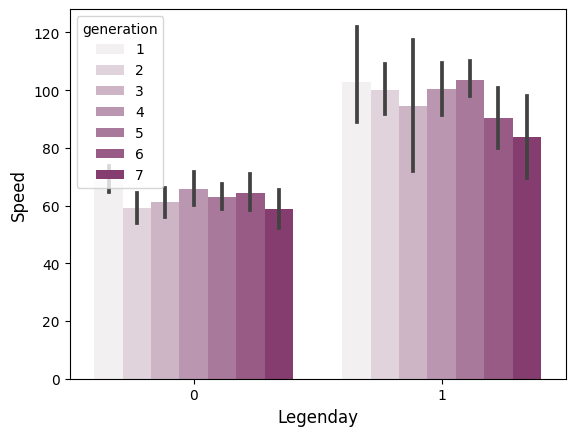

In [40]:
#7 generation analysis ,grouping pokémons with if they are legendary or not.
sns.barplot(x="is_legendary",y="speed",hue="generation",data=data,color="#913175")
plt.ylabel('Speed', size='large')
plt.xlabel('Legenday', size= 'large')

plt.show()


<AxesSubplot: xlabel='is_legendary', ylabel='attack'>

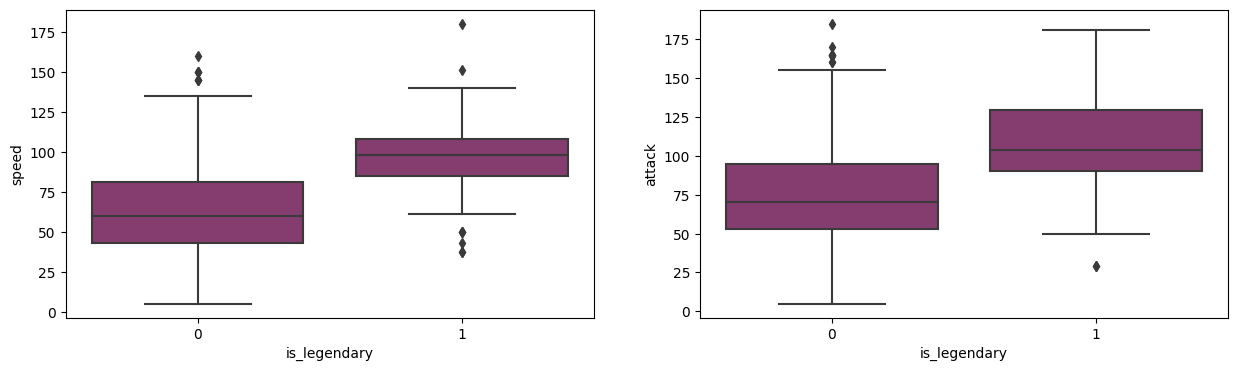

In [41]:
#Comparison between legendary and non_legendary pokémons.
f, axes = plt.subplots(1,2,figsize=(15,4))
sns.boxplot(x=data['is_legendary'],y=data['speed'],ax=axes[0],color="#913175")
sns.boxplot(x=data['is_legendary'],y=data['attack'],ax=axes[1],color='#913175')
#We can notice that legendary pokémons have greater speed and attack than the others.


<AxesSubplot: xlabel='is_legendary', ylabel='base_total'>

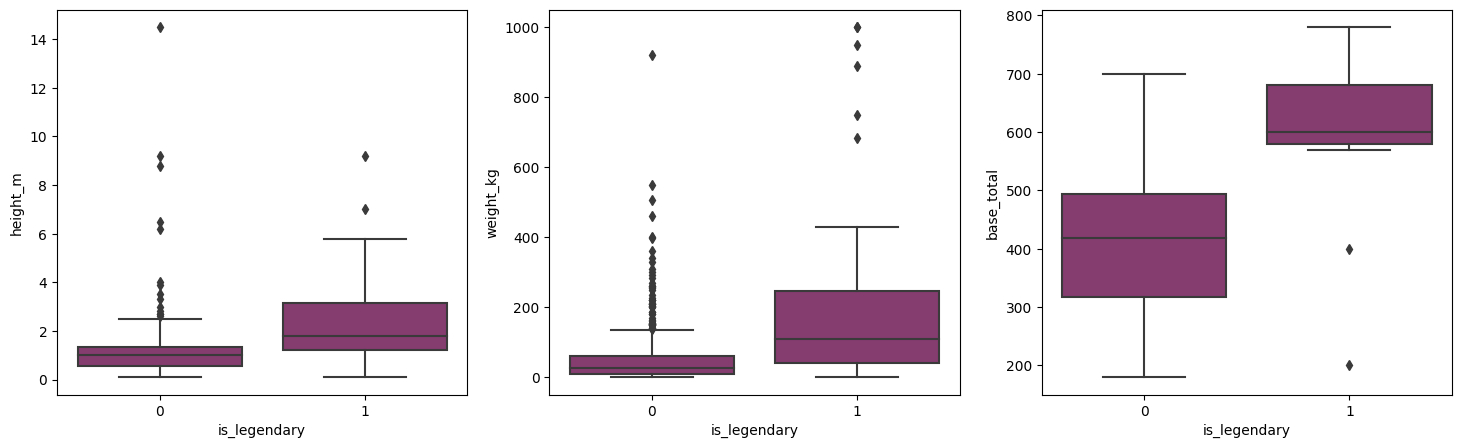

In [42]:
#Legendary pokémons height and weight.
f , axes = plt.subplots(1,3,figsize=(18,5))
sns.boxplot(x=data.is_legendary,y=data.height_m,ax=axes[0],color="#913175")
sns.boxplot(x=data.is_legendary,y=data.weight_kg,ax=axes[1],color="#913175")
sns.boxplot(x=data.is_legendary,y=data.base_total,ax=axes[2],color='#913175')

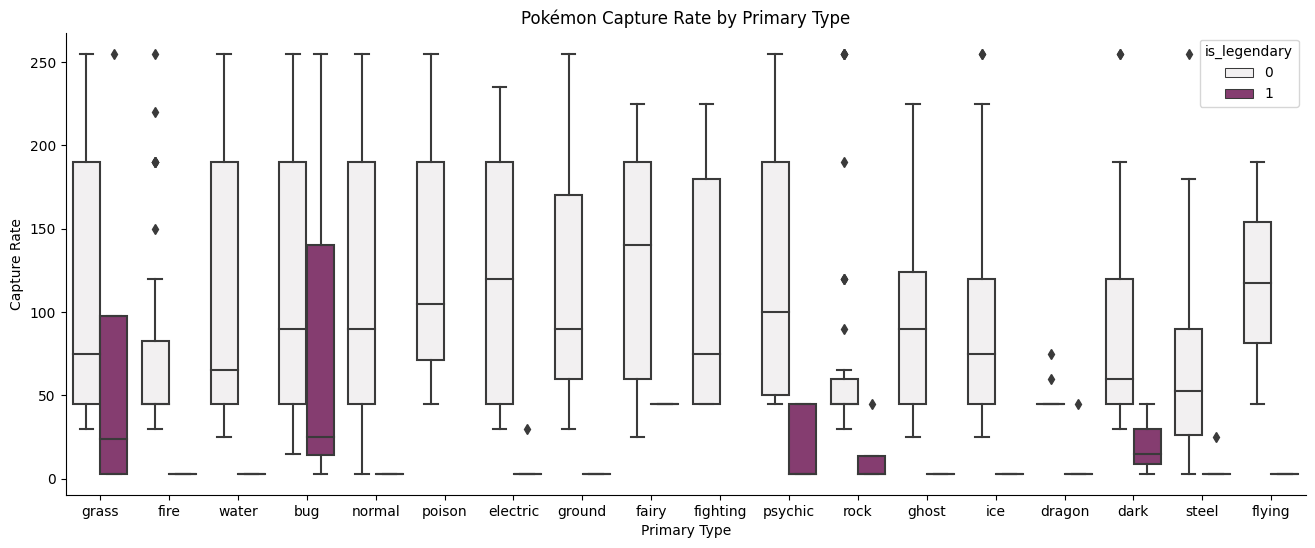

In [43]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(x='type1',y='capture_rate', hue='is_legendary', data = data,color="#913175")
ax.set_xlabel(xlabel='Primary Type')
ax.set_ylabel(ylabel='Capture Rate')
ax.set_title('Pokémon Capture Rate by Primary Type')
sns.despine(top=True,right=True)

In [44]:

legend = data[data['is_legendary']==1][["name","type1","type2"]]
legend.head()

,name,type1,type2
143,Articuno,ice,flying
144,Zapdos,electric,flying
145,Moltres,fire,flying
149,Mewtwo,psychic,None
150,Mew,psychic,None


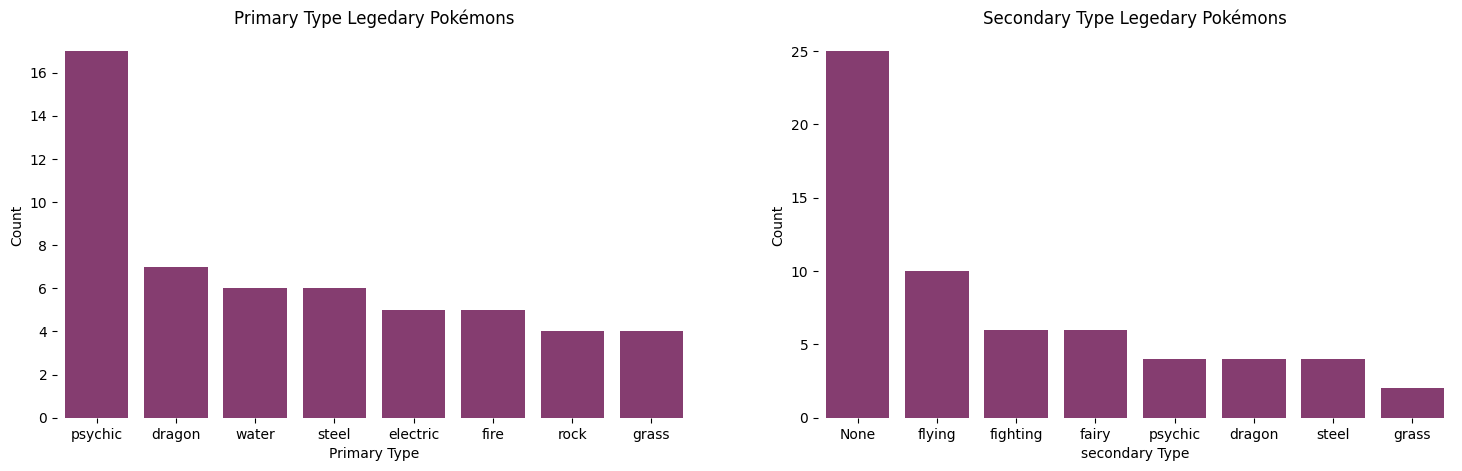

In [45]:
fig,axes = plt.subplots(1,2,figsize=(18,5))
ax = sns.countplot(x='type1',data=legend,order=legend['type1'].value_counts().index[:8],ax=axes[0],color="#913175")
ax.set_title('Primary Type Legedary Pokémons')
ax.set(xlabel='Primary Type',ylabel='Count')


ax = sns.countplot(x='type2',data=legend,order=legend['type2'].value_counts().index[:8],ax=axes[1],color="#913175")
ax.set_title('Secondary Type Legedary Pokémons')
ax.set(xlabel='secondary Type',ylabel='Count')
sns.despine(bottom=True,left=True)

Text(0.5, 1.0, 'The Best Pokémon')

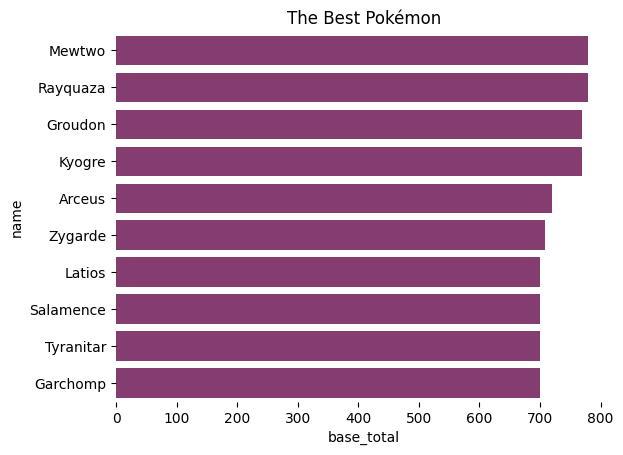

In [46]:
top10_pokemon_base_total = data.loc[:, ['name', 'base_total']].sort_values(by='base_total',ascending=False,)[:10]
ax = sns.barplot(data=top10_pokemon_base_total,x='base_total',y='name',color="#913175")
sns.despine(left=True,bottom=True)
ax.set_title("The Best Pokémon")

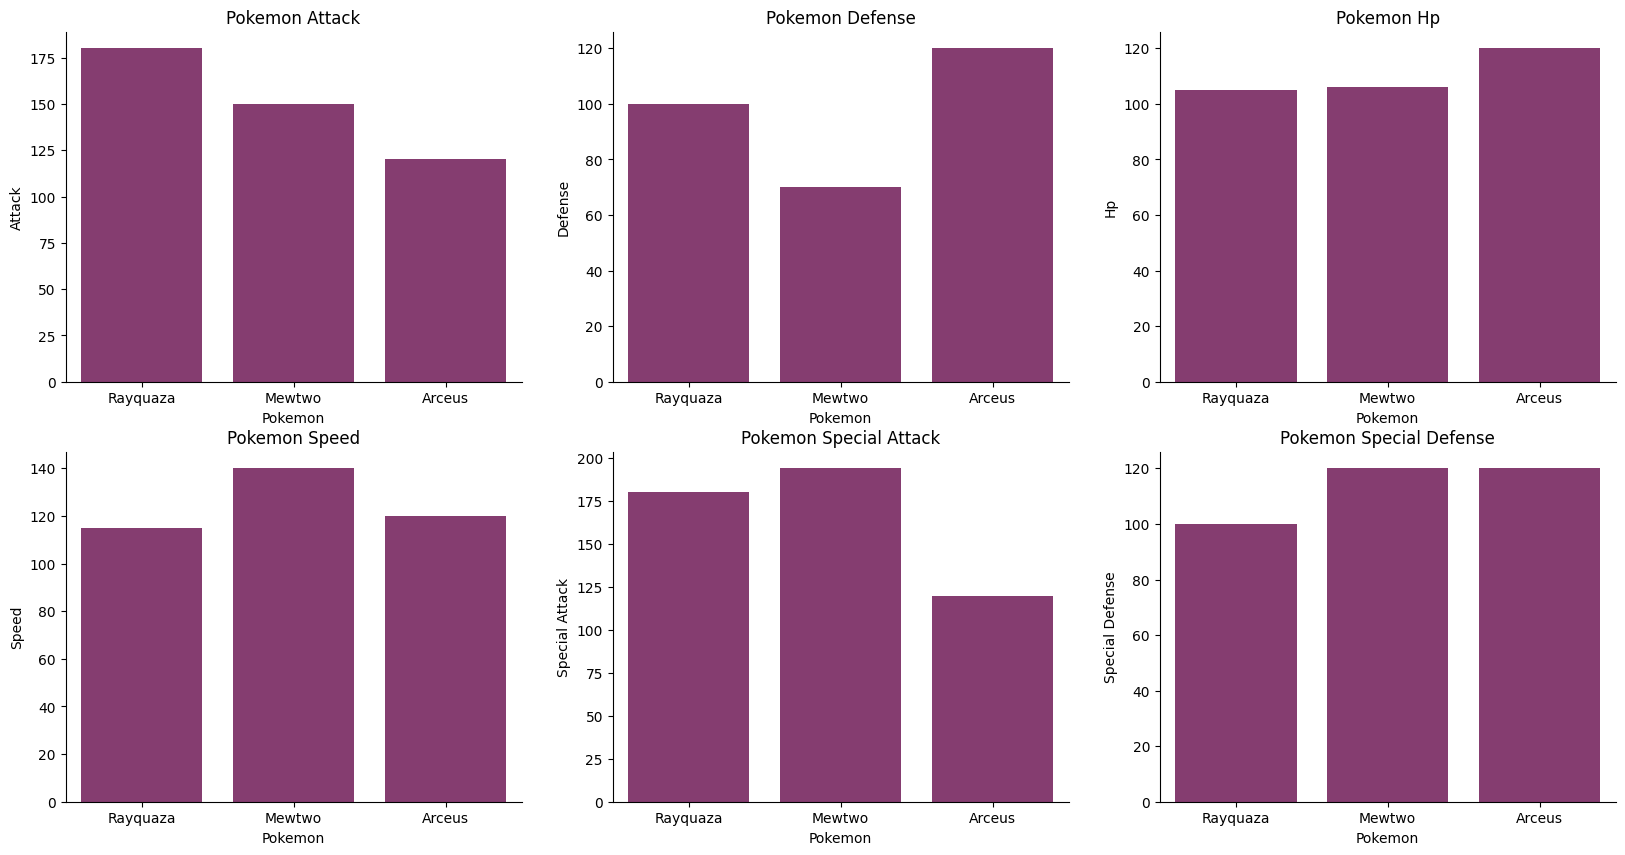

In [47]:
top10_pokemon = data.loc[:, ['name','sp_attack','sp_defense','hp','speed','base_total','attack','defense']].sort_values(by=['base_total','attack'],ascending=False,)[:10]
top3_pokemon =top10_pokemon[top10_pokemon['name'].isin(['Arceus','Mewtwo','Rayquaza'])]
fig,axes = plt.subplots(2,3,figsize=(20,10))


ax = sns.barplot(data=top3_pokemon,x='name',y='attack',color='#913175',ax=axes[0][0])
ax.set_title('Pokemon Attack')
ax.set(xlabel='Pokemon',ylabel='Attack')

ax = sns.barplot(data=top3_pokemon,x='name',y='defense',color='#913175',ax=axes[0][1])
ax.set_title('Pokemon Defense')
ax.set(xlabel='Pokemon',ylabel='Defense')

ax = sns.barplot(data=top3_pokemon,x='name',y='hp',color='#913175',ax=axes[0][2])
ax.set_title('Pokemon Hp')
ax.set(xlabel='Pokemon',ylabel='Hp')

ax = sns.barplot(data=top3_pokemon,x='name',y='speed',color='#913175',ax=axes[1][0])
ax.set_title('Pokemon Speed')
ax.set(xlabel='Pokemon',ylabel='Speed')

ax = sns.barplot(data=top3_pokemon,x='name',y='sp_attack',color='#913175',ax=axes[1][1])
ax.set_title('Pokemon Special Attack')
ax.set(xlabel='Pokemon',ylabel='Special Attack')

ax = sns.barplot(data=top3_pokemon,x='name',y='sp_defense',color='#913175',ax=axes[1][2])
ax.set_title('Pokemon Special Defense')
ax.set(xlabel='Pokemon',ylabel='Special Defense')



sns.despine()

Modeling

In [48]:
all_types = set(data['type1']).union(set(data['type2']))
type_id_dict = dict(zip(list(all_types), range(len(all_types))))

In [49]:
#To fit our model we have to convert the categorical data into numerical.Let's do that!

types_ = set(data['type1']).union(set(data['type2'])) 
type_id = dict(zip(list(types_), range(len(types_)))) #we giving each type a numerical number.



In [50]:
#Replacing the columns.
for type_name, type_id in type_id_dict.items():
    data['type1'].replace(type_name, type_id, inplace=True)
    data['type2'].replace(type_name, type_id, inplace=True)
    


   
data[['type1', 'type2']].head()

,type1,type2
0,18,1
1,18,1
2,18,1
3,16,7
4,16,7


In [51]:
catgDataF = list()
for col in data:
    if (data[col].dtype == object):
        catgDataF.append(col)
catgDataF

['abilities', 'classfication', 'name', 'percentage_male', 'type']

In [52]:
modeling_data = data.drop(columns=catgDataF,axis=1)

In [53]:
X = modeling_data.drop("is_legendary",axis=1)
y = data["is_legendary"]

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Random Forest

In [55]:
rdf_clf = RandomForestClassifier()
rdf_clf.fit(X_train,y_train)
y_pred = rdf_clf.predict(X_test)

In [56]:
y_train.shape

(640,)

In [57]:
y_pred.shape

(161,)

In [58]:
y_test.shape

(161,)

In [59]:
confusion_matrix(y_test,y_pred)

array([[145,   1],
       [  1,  14]], dtype=int64)

o 145 True Negative: 145 are not legendary and predicted as not legendary
o 15 True Positive : 15 are legendary and predicted as legendary
o 1 False Positive : 1 is not legendary and predicted as legendary 




In [60]:

accuracy_score(y_pred=y_pred,y_true=y_test)

0.9875776397515528

SVM

In [61]:
svm_model = svm.SVC()
svm_model.fit(X_train,y_train)
y_pred  = svm_model.predict(X_test)

In [62]:
confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[146,   0],
       [ 15,   0]], dtype=int64)

In [63]:
accuracy_score(y_pred=y_pred,y_true=y_test)

0.906832298136646